<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Notes/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
# influence_plot used for Q-Q plot

In [ ]:
cars = pd.read_csv('/content/Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
# Cheacking total null values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [ ]:
# Correlation matrix
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


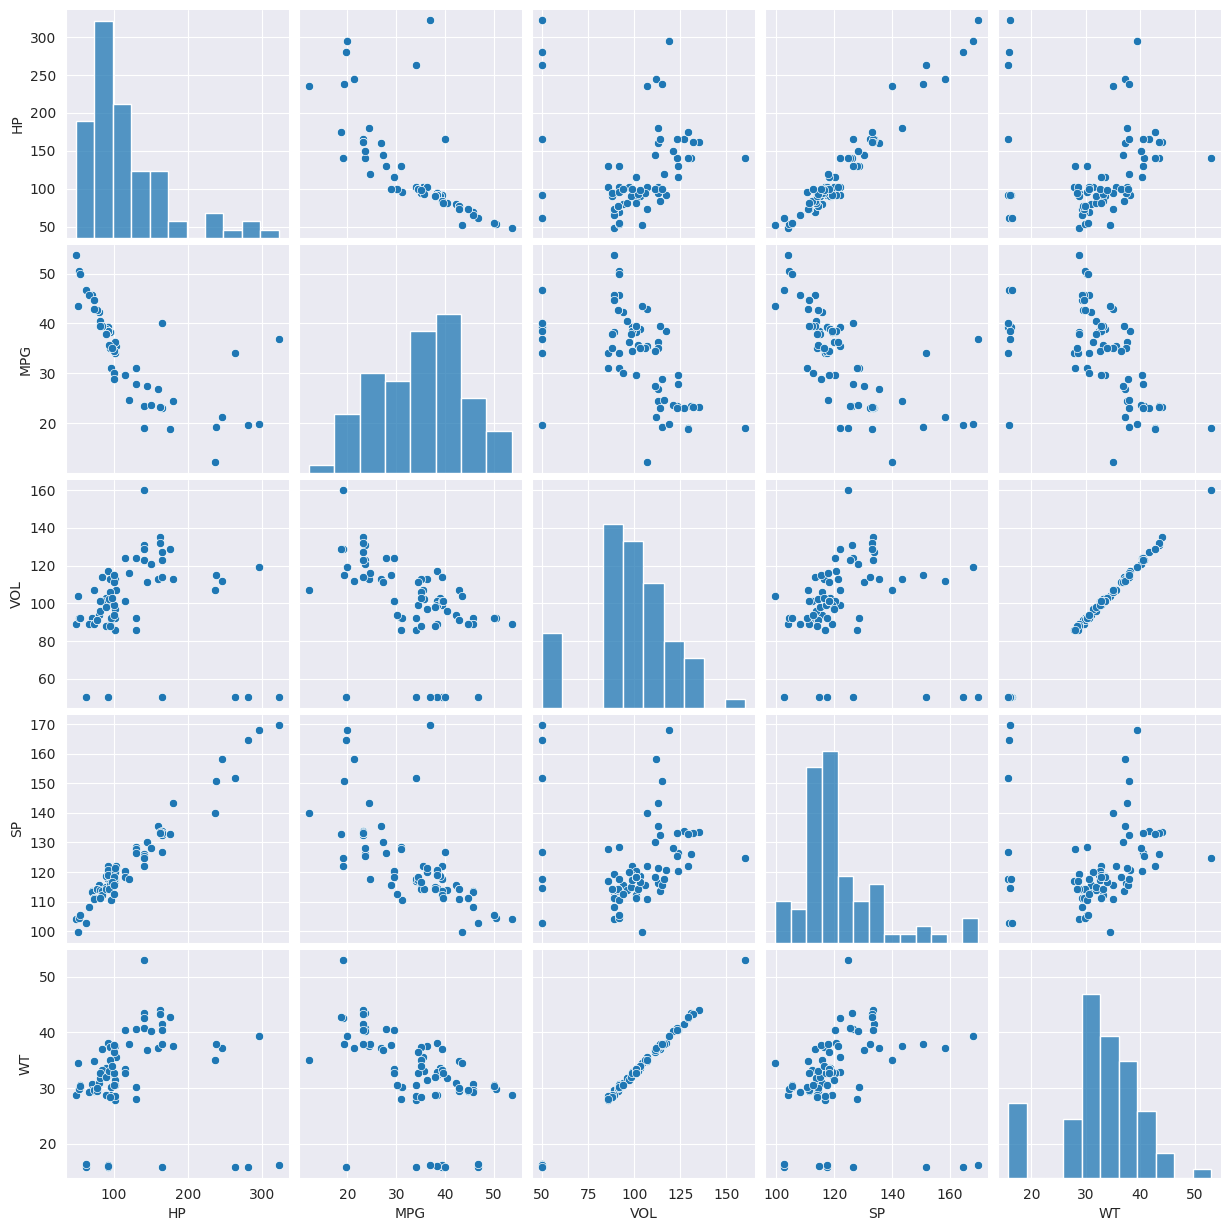

In [ ]:
# SCATTER PLOT AND PAIRPLOTS
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Model Building

In [ ]:
# Model building
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [ ]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [ ]:
# t-values and p-values
print(model.tvalues)
print(model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64
Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
# r-squared values
(model.rsquared, model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

## simple linear regression models

In [ ]:
ml_v = smf.ols('MPG~VOL', data=cars).fit()
print(ml_v.tvalues)
print(ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64
Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
ml_w = smf.ols('MPG~WT',data=cars).fit()
print(ml_w.tvalues)
print(ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64
Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
ml_wv = smf.ols('MPG~VOL+WT', data=cars).fit()
print(ml_wv.tvalues)
print(ml_wv.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64
Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


## Calculating VIF

In [ ]:
rsq_hp = smf.ols('HP~WT+VOL+SP', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~HP+WT+SP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~HP+VOL+WT',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# Storing vif values in data frame
d1 = {'Variables':['HP','WT','VOL','SP'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
vif_dataframe = pd.DataFrame(d1)
vif_dataframe

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Residual Analysis

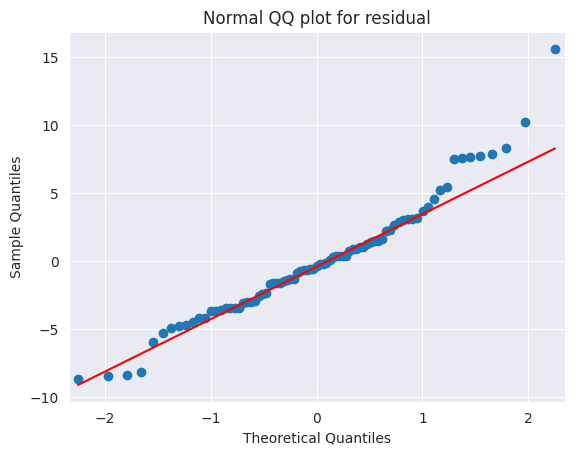

In [ ]:
# Testing for Normality of Residual (Q-Q plot)

import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q') # line = 'q' is 45 degree line
plt.title('Normal QQ plot for residual')
plt.show()


In [ ]:
list(np.where(model.resid > 10))

[array([ 0, 76])]

### Residual plots for Homoscedaticity

In [ ]:
def get_standerdized_values(vals):
  return (vals - vals.mean())/vals.std()

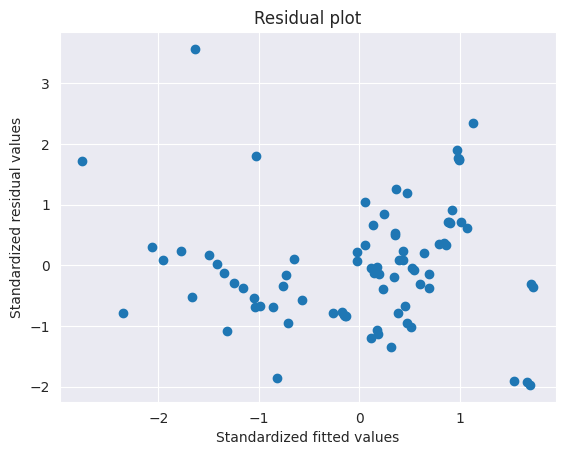

In [ ]:
plt.scatter(get_standerdized_values(model.fittedvalues),get_standerdized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Regressors

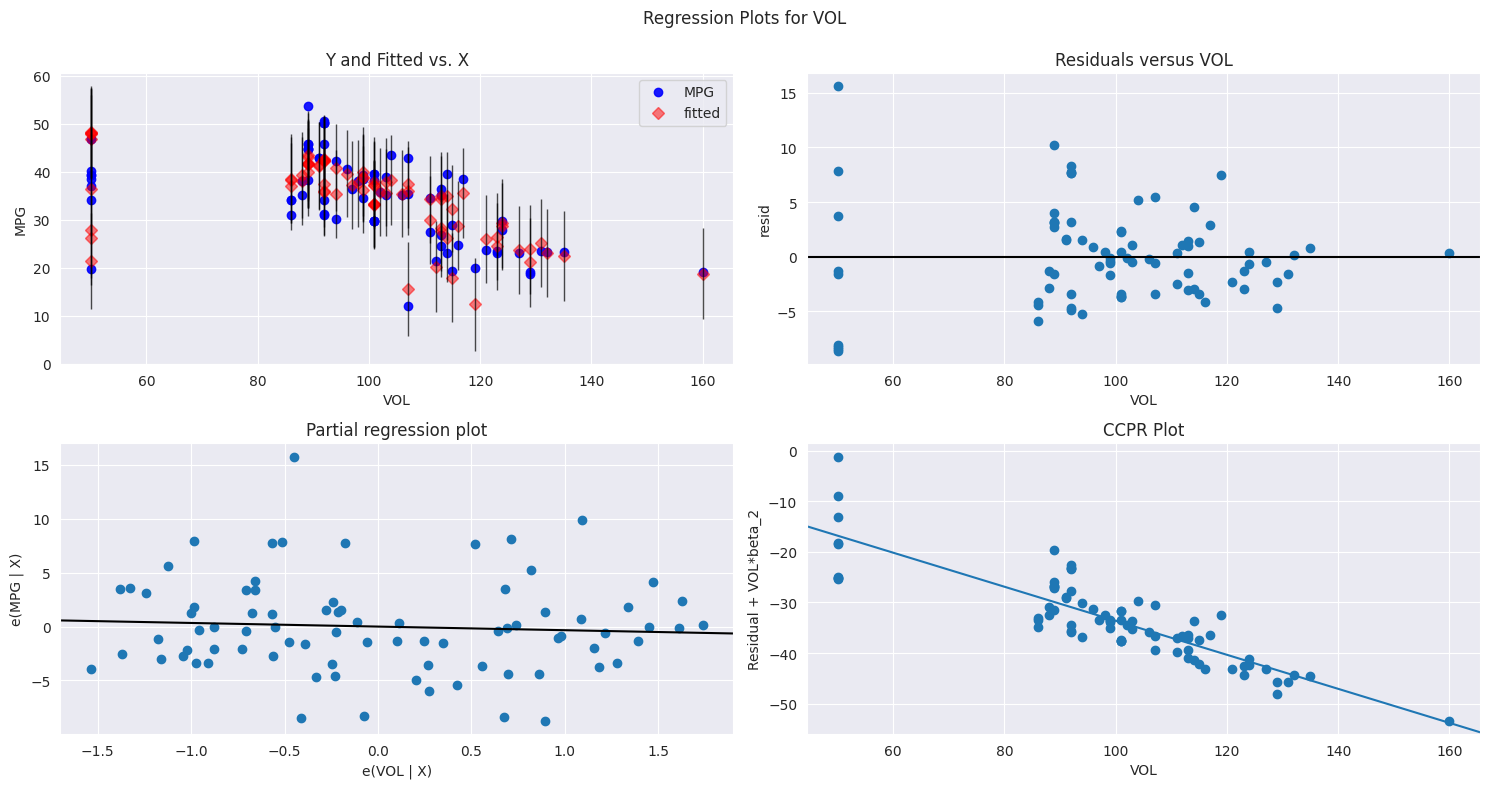

In [ ]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig = fig)
plt.show()

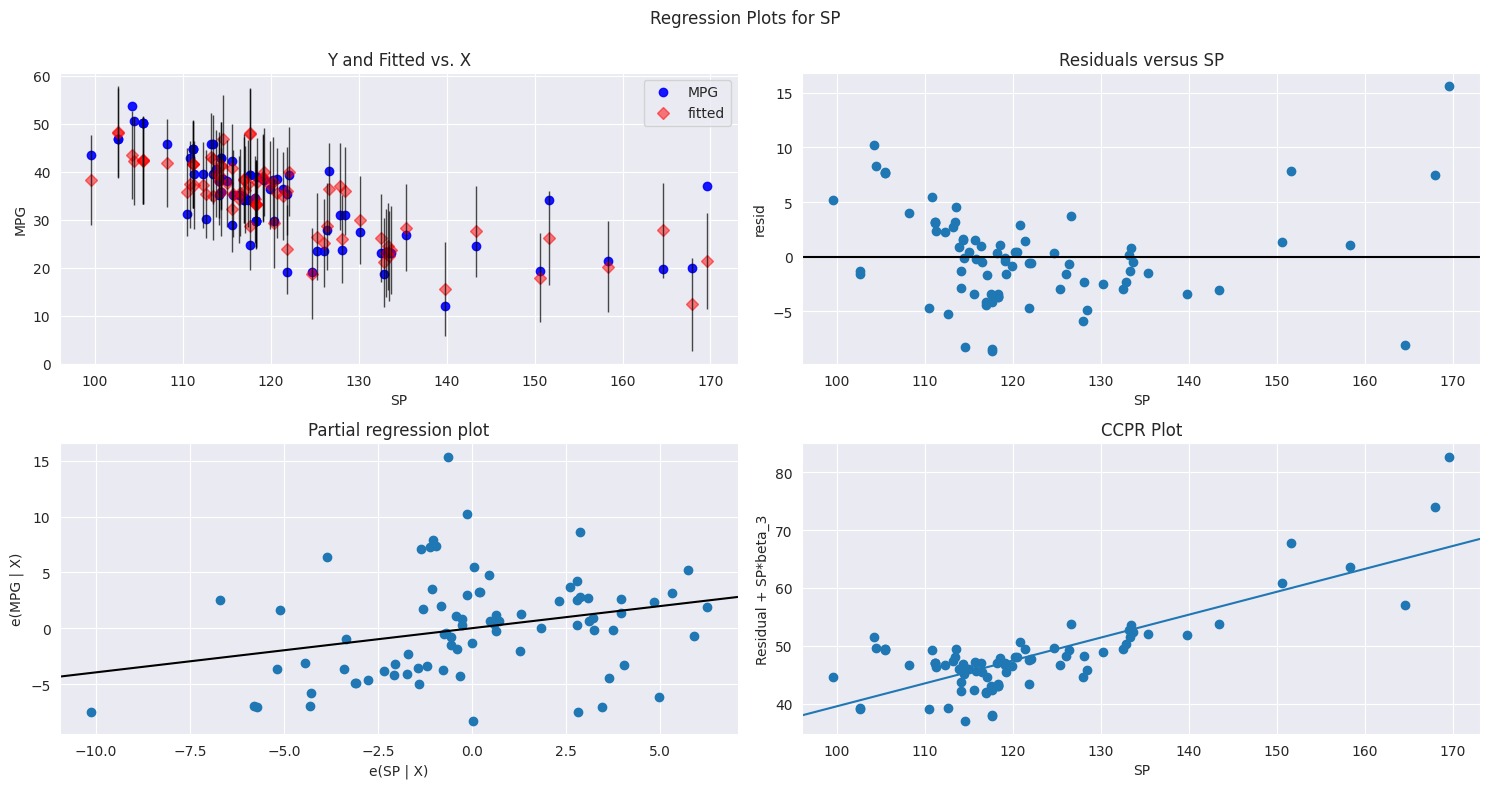

In [ ]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig = fig)
plt.show()

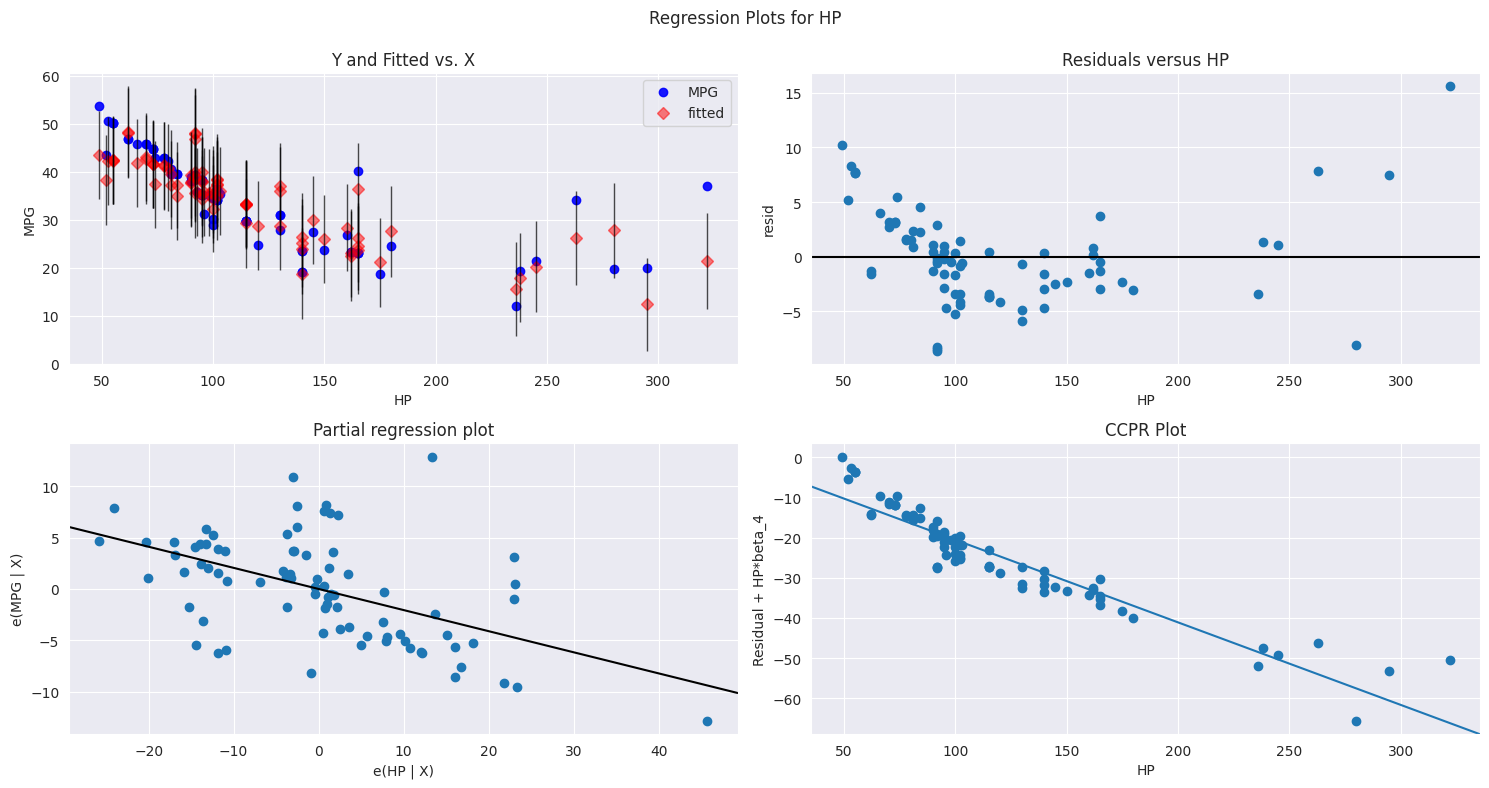

In [ ]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

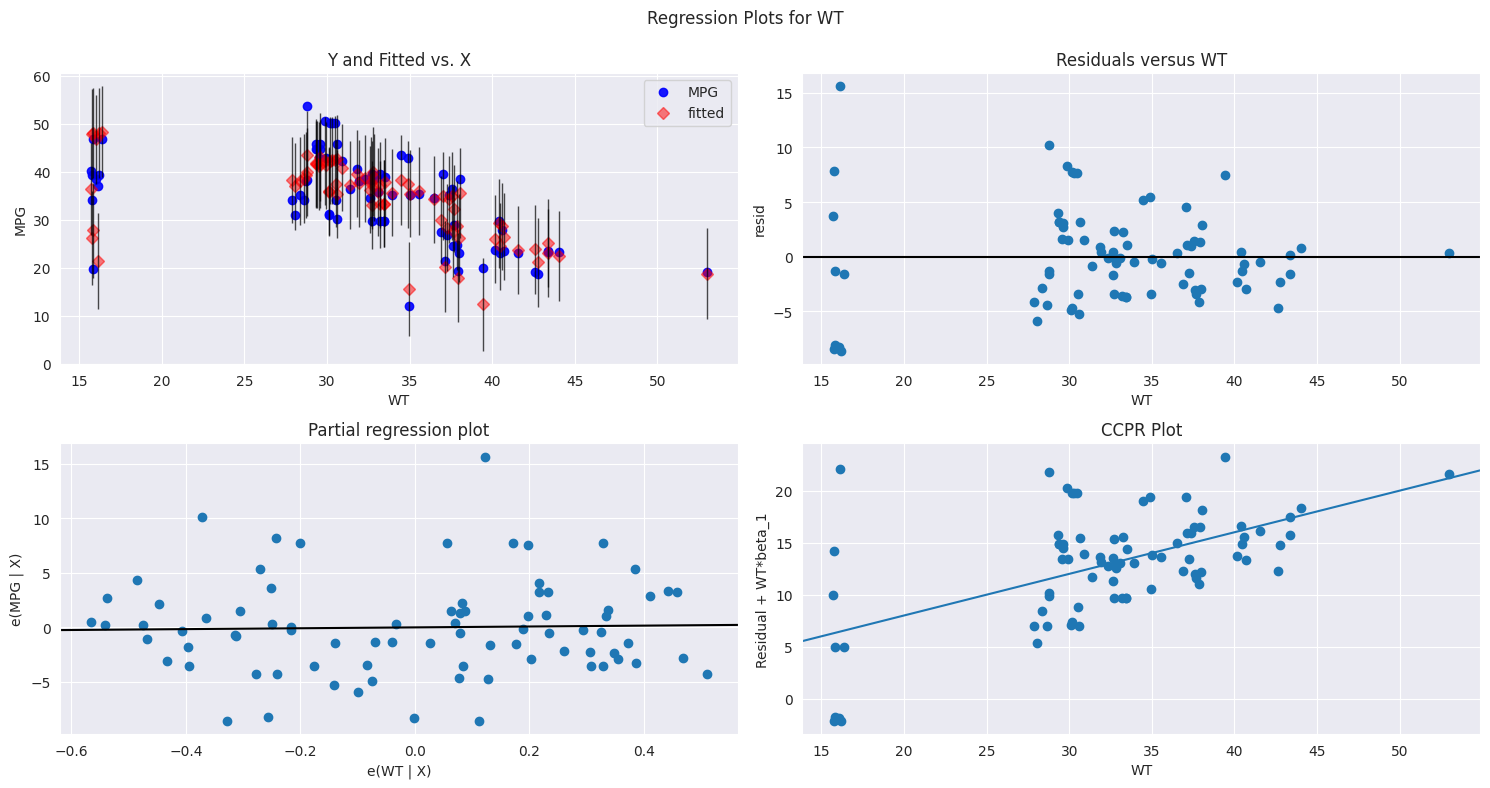

In [ ]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig = fig)
plt.show()

# Model Deletion Diagnostics

## Detecting influencers/outliers

### Cook's distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

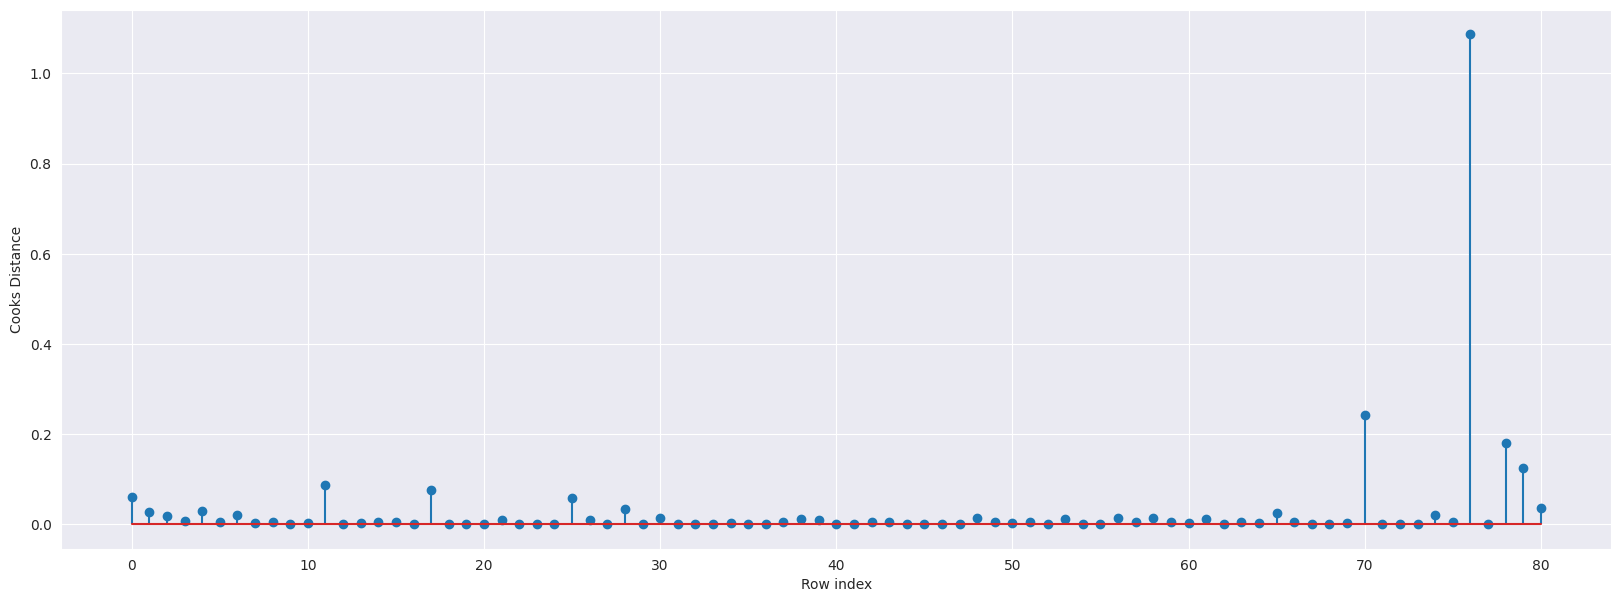

In [ ]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


In [ ]:
# index and value of influencer where c is more than 0.5
(np.argmax(c), np.max(c))

(76, 1.0865193998179699)

### High influence points

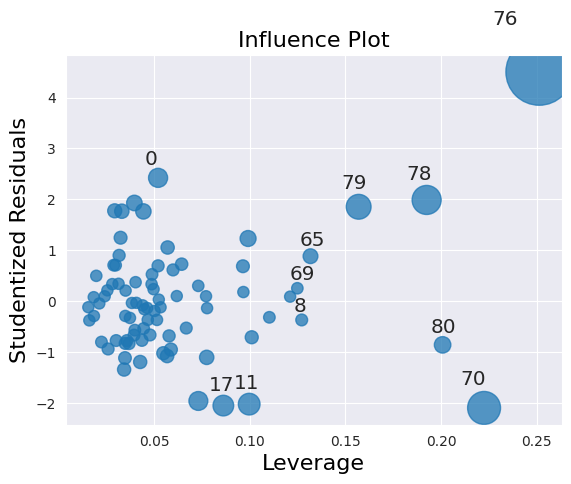

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.2222222222222222

from the above plot it is noticed that data point 70 and 76 are the influencres

In [ ]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
# See the difference in HP and other variables
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [ ]:
cars_new  = pd.read_csv('/content/Cars.csv')

In [ ]:
# Discard the datapoints which are influencers and reasign the index number using(reset_index())
car1 = cars_new.drop(cars_new.index[[70,76]], axis = 0).reset_index()

In [ ]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [ ]:
# Drop the original index
car1 = car1.drop(['index'],axis=1)

In [ ]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


## Build model

In [ ]:
# Exclude variable WT and generate rsquared and AIC values
final_ml_v = smf.ols('MPG~VOL+SP+HP', data = car1).fit()
(final_ml_v.rsquared, final_ml_v.aic)

(0.8161692010376008, 446.1172263944772)

In [ ]:
# Exclude variable 'VOL' and generate rsquared and AIC values
final_ml_w = smf.ols('MPG~WT+SP+HP',data = car1).fit()
(final_ml_w.rsquared, final_ml_w.aic)

(0.8160034320495303, 446.1884323575032)

Comparing above r-squared and AIC values, model final_ml_v has high r-squared and low aic value, Hence include variable 'VOL' so multi collinearity problem would be resolved.

## Cook's distance

In [ ]:
model_influence_v = final_ml_v.get_influence()
(c_v,_) = model_influence_v.cooks_distance
c_v

array([5.53495774e-02, 2.85062799e-02, 2.85062799e-02, 5.34950005e-03,
       3.55869338e-02, 3.79038996e-03, 2.85062799e-02, 1.32771748e-03,
       1.32771748e-03, 7.56691001e-04, 3.33261259e-03, 1.23339926e-01,
       1.14076048e-03, 3.33261259e-03, 6.21782521e-03, 3.33261259e-03,
       7.09472284e-04, 1.23339926e-01, 7.09472284e-04, 1.25650858e-04,
       1.65511111e-04, 1.01187126e-02, 9.35876569e-06, 1.90597263e-04,
       1.71252801e-03, 9.20677227e-02, 4.07373927e-03, 1.65511111e-04,
       4.16239310e-02, 3.31390188e-04, 6.85632716e-03, 1.32756399e-03,
       3.93747165e-04, 7.49398680e-04, 1.27154771e-03, 6.48751557e-06,
       4.76583309e-04, 4.91748288e-03, 4.91748288e-03, 1.49663702e-02,
       1.43677902e-04, 3.71158078e-05, 2.37724155e-03, 2.97638136e-03,
       6.13773416e-05, 6.29555458e-04, 8.19182717e-08, 1.01290206e-04,
       2.15887173e-02, 3.96459368e-03, 3.96459368e-03, 3.96459368e-03,
       3.11686431e-06, 1.13032165e-02, 9.69905045e-04, 5.96059114e-04,
      

Text(0, 0.5, 'Cooks Distance')

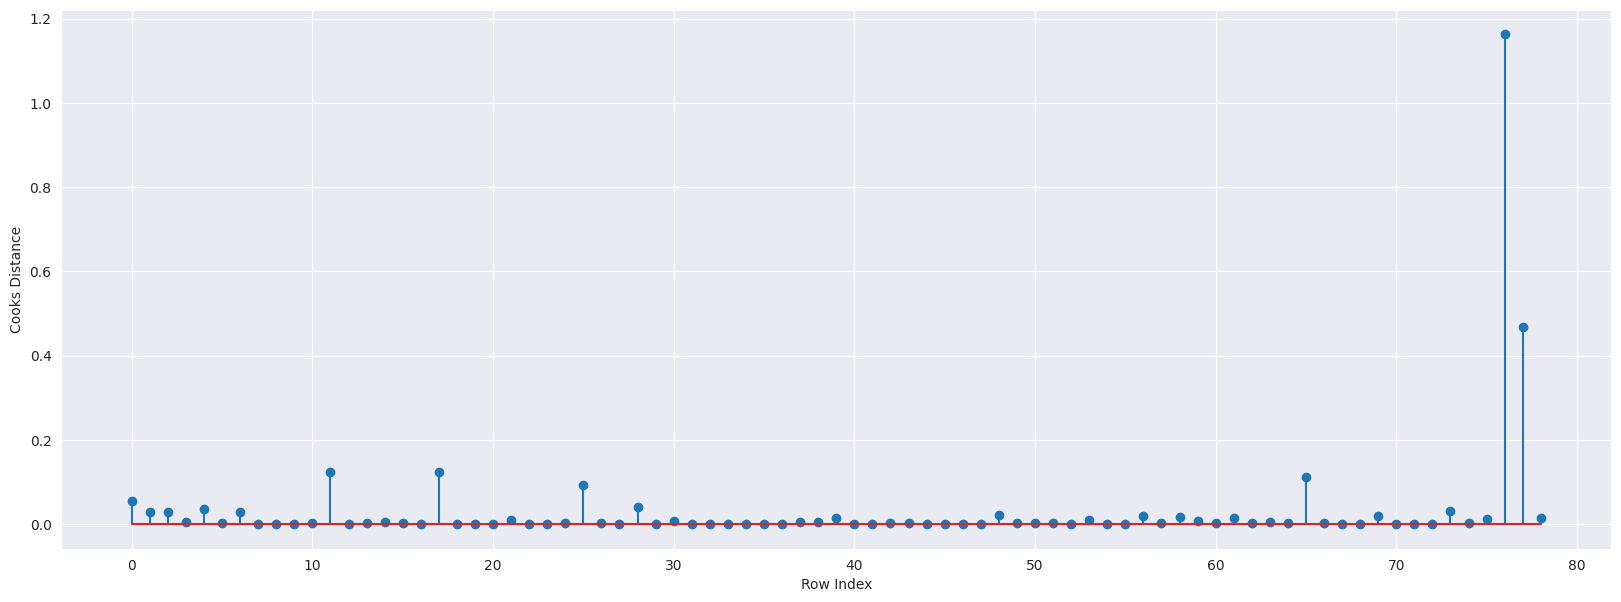

In [ ]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(car1)), np.round(c_v, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')


In [ ]:
# Index of data points where c is more than 0.5
(np.argmax(c_v), np.max(c_v))

(76, 1.1629387469135182)

In [ ]:
car2 = car1.drop(car1.index[[76,77]],axis=0)

In [ ]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
# Reset the index
car3 = car2.reset_index()

In [ ]:
car4 = car3.drop(['index'],axis=1)

In [ ]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


## Build model on new data

In [ ]:
final_ml_V = smf.ols('MPG~VOL+SP+HP', data=car4).fit()

In [ ]:
# again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V,_) = model_influence_V.cooks_distance


Text(0, 0.5, 'cooks Distance')

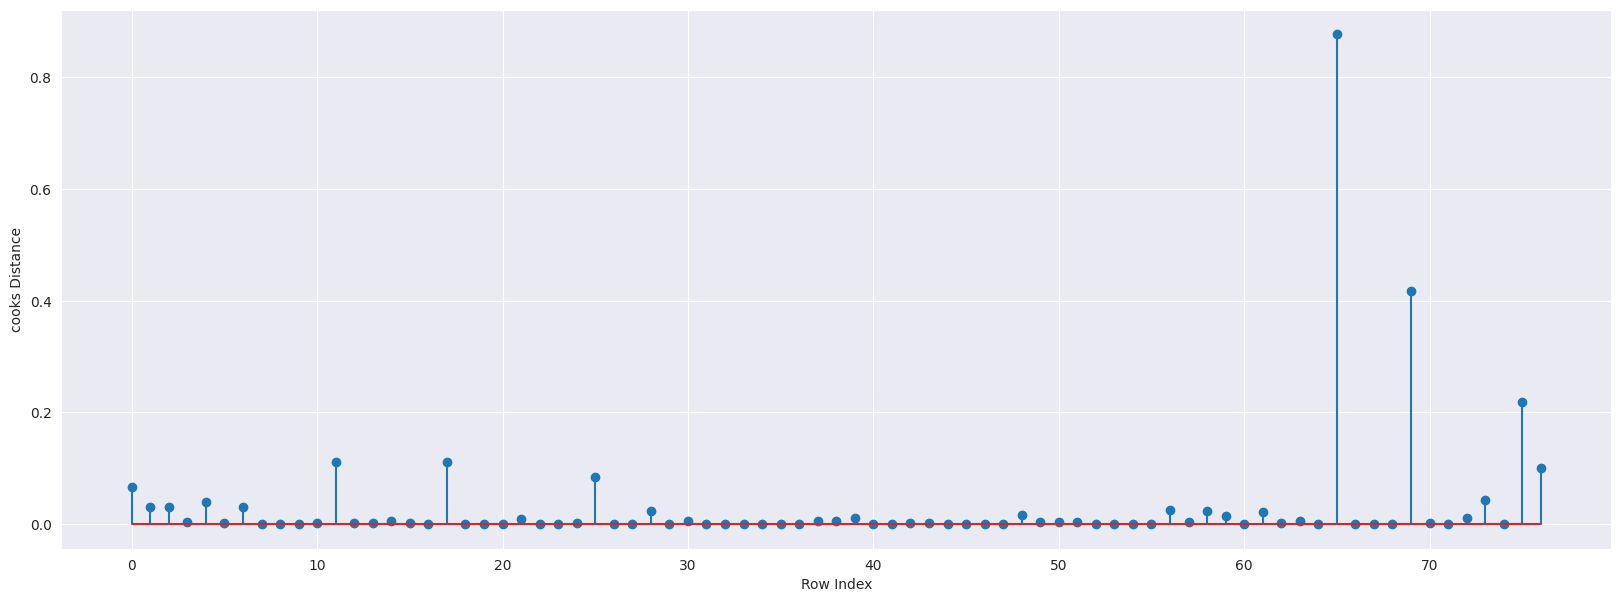

In [ ]:
fig = plt.subplots(figsize= (20,7))
plt.stem(np.arange(len(car4)), np.round(c_V,3))
plt.xlabel("Row Index")
plt.ylabel('cooks Distance')

In [ ]:
# index of data point where c is more than 0.5
(np.argmax(c_V), np.max(c_V))

(65, 0.8774556986296674)

# Finalized Model

In [ ]:
final_ml_V = smf.ols('MPG~HP+SP+VOL', data=car4).fit()

In [ ]:
(final_ml_V.rsquared, final_ml_V.aic)

(0.8669636111859061, 409.41530627195084)

# Predicting New values

In [ ]:
# New data for prediction
new_data = pd.DataFrame({'HP':40, 'VOL':95, 'SP':102, 'WT':35},index=[1])

In [ ]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64